In [10]:
import pandas as pd
import seaborn as sns
from Bio.Seq import Seq
import re

In [17]:
df_42 = pd.read_csv("./data/airrship_shm_seed42_100_000.tsv", sep="\t")
df_24 = pd.read_csv("./data/airrship_shm_seed24_100_000.tsv", sep="\t")
df_all = pd.concat([df_42["sequence"], df_24["sequence"]])
df_all.duplicated().any()

False

In [21]:
pos_names = [ f"{seg}_sequence_{pos}" for seg in "vdj" for pos in ("start", "end") ]
pos_names.append("sequence")
df_implant = pd.read_csv("./data/implant_shm_seed24_100_000.tsv", sep="\t", index_col=0)
df_all = pd.concat([df_42[pos_names], df_implant[pos_names]])
df_all.duplicated().sum()

421

In [2]:
# df_small = pd.read_csv("./data/airrship_shm_seed42_10_000.tsv", sep="\t")
# df_medium = pd.read_csv("./data/airrship_shm_seed42_50_000.tsv", sep="\t")
# df_large = pd.read_csv("./data/airrship_shm_seed42_100_000.tsv", sep="\t")
# df_all = pd.concat([df_small, df_medium, df_large])
# df_all.duplicated().any()

True

In [3]:
# (df_medium["sequence"] == df_large["sequence"][:50000]).all()

True

In [4]:
df = pd.read_csv("./data/airrship_shm_seed42_100_000.tsv", sep="\t")
df.head()

,sequence_id,sequence,productive,stop_codon,vj_in_frame,v_call,d_call,j_call,junction,junction_aa,...,d_sequence_start,d_sequence_end,j_sequence_start,j_sequence_end,shm_events,shm_count,shm_freq,unmutated_sequence,gapped_unmutated_sequence,gapped_mutated_sequence
0,0,CAGGTGCAGCTGCGGGAGTCGGGCCCAGGGCTGGTGAAGCCTTTGG...,T,T,F,IGHV4-61*08,IGHD3-3*02,IGHJ4*01,TGCGCGAGGCCGCCAGGTGTATCAGCATTTAGGAGGACACCCGCTT...,CARPPGVSAFRRTPAWDFDPW,...,307,318,338,382,"14:A>G,30:A>G,44:C>T,68:C>A,84:C>T,89:G>C,90:C...",28,0.073298,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,CAGGTGCAGCTGCAGGAGTCGGGCCCA...GGACTGGTGAAGCCTT...,CAGGTGCAGCTGCGGGAGTCGGGCCCA...GGGCTGGTGAAGCCTT...
1,1,CAGGTCACTTTGAGGGAGTCTGGTCCTGCGCTGGTGAAACCCACAC...,T,T,F,IGHV2-70*19,IGHD2-8*02,IGHJ4*01,TGTGCACGGGGGCATGTCCACGATAGGGTCTTTCCGAGAGTTGACT...,CARGHVHDRVFPRVDFW,...,310,313,329,370,"9:C>T,72:C>T,82:T>C,85:C>A,88:A>T,100:A>G,105:...",20,0.054054,CAGGTCACCTTGAGGGAGTCTGGTCCTGCGCTGGTGAAACCCACAC...,CAGGTCACCTTGAGGGAGTCTGGTCCT...GCGCTGGTGAAACCCA...,CAGGTCACTTTGAGGGAGTCTGGTCCT...GCGCTGGTGAAACCCA...
2,2,GAGGTGCAGCTCCCGGAGTCTGGGGGCGGCCTGGTACAGCCTGGGG...,T,T,F,IGHV3-23*03,IGHD5-24*01,IGHJ4*01,TGTGCGAGAGACGGAAAAAAGAGACCCGACTGG,CARDGKKRPDW,...,305,309,314,349,"12:G>C,13:T>C,14:T>C,27:A>C,31:T>C,71:C>T,90:C...",34,0.097421,GAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTGGTACAGCCTGGGG...,GAGGTGCAGCTGTTGGAGTCTGGGGGA...GGCTTGGTACAGCCTG...,GAGGTGCAGCTCCCGGAGTCTGGGGGC...GGCCTGGTACAGCCTG...
3,3,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGACCAGCCTGGGA...,T,T,F,IGHV3-33*05,IGHD3/OR15-3a*01,IGHJ4*01,TGTGCGAGAGACAAAAATTTGGGACTGGCCGGGAACTTCTTTGACT...,CARDKNLGLAGNFFDYW,...,304,313,326,367,"35:T>A,72:G>T,92:G>C,98:G>A,132:G>A,151:A>T,15...",17,0.046322,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,CAGGTGCAGCTGGTGGAGTCTGGGGGA...GGCGTGGTCCAGCCTG...,CAGGTGCAGCTGGTGGAGTCTGGGGGA...GGCGTGGACCAGCCTG...
4,4,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTAGTTCAGCCTGGGG...,T,T,F,IGHV3-74*02,IGHD1-26*01,IGHJ4*01,TGTGCAAGACAAGTGGGGGGCAATATCGACCACCTTTCGAAATACT...,CARQVGGNIDHLSKYYW,...,298,301,329,367,"89:G>C,93:C>T,97:T>C,119:C>T,138:G>A,147:A>C,1...",14,0.038147,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTAGTTCAGCCTGGGG...,GAGGTGCAGCTGGTGGAGTCTGGGGGA...GGCTTAGTTCAGCCTG...,GAGGTGCAGCTGGTGGAGTCTGGGGGA...GGCTTAGTTCAGCCTG...


In [5]:
# check if the sequence, segment boundaries and segments are consistent
def check_consistence(row):
    pos_names = [ f"{seg}_sequence_{pos}" for seg in "vdj" for pos in ("start", "end") ]
    seq = row["sequence"]
    pos = row[pos_names]
    for seg in "vdj":
        cor_seq = row[seg + "_sequence"]
        start = pos[seg + "_sequence_start"] - 1
        end = pos[seg + "_sequence_end"]
        flag = (seq[start:end] == cor_seq)
    return flag

df.apply(check_consistence, axis=1).all()

True

In [6]:
# check if there is any duplicated sequences
df["sequence"].duplicated().any()

False

In [7]:
# check if sequence length equals to j_sequence_end
seq_len = df["sequence"].str.len()
(seq_len == df["j_sequence_end"]).all()

True

In [8]:
seq_len.describe()

count    100000.000000
mean        368.834470
std          12.637981
min         331.000000
25%         361.000000
50%         367.000000
75%         376.000000
max         436.000000
Name: sequence, dtype: float64

<Axes: xlabel='sequence', ylabel='Count'>

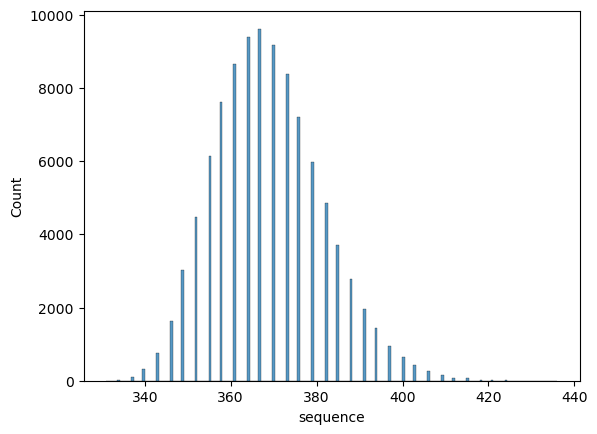

In [9]:
sns.histplot(seq_len)

In [6]:
(seq_len % 3 == 1).all()

True

In [7]:
seq_a = Seq(df.loc[0, "sequence"])
seq_a_tran = seq_a.translate()
df.loc[0, "junction_aa"] in seq_a_tran

/home/s2449149/.conda/envs/proj_lyf/lib/python3.10/site-packages/Bio/Seq.py:2804: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


True

In [8]:
df.loc[0, "gapped_mutated_sequence"]

'CAGGTGCAGCTGCGGGAGTCGGGCCCA...GGGCTGGTGAAGCCTTTGGAGACCCTGTCCCTCACCTGCAATGTCTCTGGTGGCTCTGTCACT......AGTGGTGGTTACTACTGGAGTTGGGTCCGGCTGACCCCAGGGAAGGGACTGGACTGGATTGGTTTTCTTTATTACAGT.........GGGAGTACCAATTACAACCCCTCCCTCGAG...ACTCGAGTCACCATATCAGTAGACACGGCCAAGAACCAGTTCTCTCTGAAGGTGAGCTCTGTGACCGCTGCGGACACGGCCGTGTATTACTGCGCGAGGCCGCCAGGTGTATCAGCATTTAGGAGGACACCCGCTTGGGACTTTGACCCCTGGGGCCATGGAACCCTGGTCACCGTCTCCTCAG'

In [11]:
pos_names = [ f"{seg}_sequence_{pos}" for seg in "vdj" for pos in ("start", "end") ]
df_pos = df[pos_names]
df_pos.mean()

v_sequence_start      1.0000
v_sequence_end      295.1613
d_sequence_start    304.2075
d_sequence_end      314.9446
j_sequence_start    323.2686
j_sequence_end      368.7943
dtype: float64

In [26]:
pos_array = df_pos.to_numpy()
pos_mean = pos_array.mean(axis=0)
mean_pred_mse = ((pos_array - pos_mean) ** 2).mean()
mean_pred_mse

69.91171640833332